# **Assignment 5 Sanaz(due Friday Dec 2, 2022)**
# **Sanaz Hami Hassan Kiyadeh, shkiyadeh@crimson.ua.edu**

# Problem 1

## Part b

Make a *class* called **NormalDist** for making calculations involving the normal distribution $N(\mu, \sigma^2)$ given by density function 
$$
    f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \exp\left(-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2 \right).
$$
Your class should have the following functions:

* **density(x)** which gives the value of the density function $f(x)$ for given $x$.
    
* **prob(a,b)** which gives the probability that a normal random variable $X$ belongs to the interval $(a,b)$. This is given by the identity
$$
    P(a \le X \le b) = \int_a^b f(x)~dx  
    = \int \frac{1}{\sigma \sqrt{2 \pi}} \exp\left(-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2 \right)~dx.
$$
* You should use branching to write a program to calculate this integral using the Simpson's method (you should include a function for this in your class) for the following cases:

    1. $a = -\infty$, $b < \mu$, 
    2. $a = -\infty$, $b \ge \mu$,
    3. $-\infty < a \le  b < \infty$,
    4. $-\infty < a < \mu$, $b = +\infty$,
    5. $\mu < a$, $b = +\infty$.


* You can use the strings **"-inf"** and **"inf"** to give infinite end points of integration. 
    

* **expectedVal** which gives the *expected* or *mean* or *average value* of random variable $X$ with distribution $N(\mu, \sigma^2)$:
$$
    \text{E}[X] = \int_{-\infty}^{\infty} x f(x)~dx 
    = \int_{-\infty}^{\infty} \frac{x}{\sigma \sqrt{2 \pi}} \exp\left(-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2 \right)~dx
$$

* **variance** which gives the *variance* of $X$, defined by 
$$
    \text{Var[X]} = \int_{-\infty}^{\infty} (x- \mu)^2 f(x)~dx = 
    \int_{-\infty}^{\infty} \frac{(x - \mu)^2}{\sigma \sqrt{2 \pi}} \exp\left(-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2 \right)~dx.
$$
Note that this is the expected squared deviation from the mean value $\mu$.


### Hint
* You can use the **quad** function  from the **scipy.integrate** package to perform numerical integration. See the [documentation](https://docs.scipy.org/doc/scipy/tutorial/integrate.html) for more details.
* You'll need to use the change of variables from Part (a) to numerically integrate any improper integrals in the calculation of the expected value and variance. 
* You should be able to use the identities 
\begin{align*}
    P(X \le \mu) &= P(X \ge \mu) =  \frac{1}{2} \\ 
    P(a \le X \le c) &= P(a \le X \le b) + P(b \le X \le c), \text{ for all } a \le b \le c \\ 
    P(a \le X) &= 1 - P(X \ge a), \text{ for all } a \in \mathbf{R},
\end{align*}
to perform every probability calculation using only proper integrals.

In [1]:
#importing libraries

import numpy as np
import scipy.integrate as integrate

In [2]:
class NormalDist:
  def __init__(self,mu,sigma2):
    self.mu=mu
    self.sigma2=sigma2
  def density(self,x):
    coeff=1/(np.sqrt(self.sigma2*2*np.pi))
    inner_func=-0.5*((x-self.mu)**2/self.sigma2)
    return coeff*np.exp(inner_func)
  def expectedVal(self):
    return integrate.quad(lambda x: x*self.density(x), -np.inf,np.inf)[0] 
  #expected value by change of variable:
  def expectedValc(self):
    return integrate.quad(lambda x: np.tan(x)*self.density(np.tan(x))/(np.cos(x)**2),-np.pi/2,np.pi/2)[0] 
  def variance(self):
    return  integrate.quad(lambda x: (x-self.mu)**2*self.density(x), -np.inf,np.inf)[0]
  #variance by change of variable:
  def variancec(self):
    return integrate.quad(lambda x: (np.tan(x)-self.mu)**2*self.density(np.tan(x))/(np.cos(x)**2),-np.pi/2,np.pi/2)[0]
  def prob(self,a,b):
    return integrate.quad(lambda x: self.density(x), a,b)[0]  
  #prob function using change of variable:
  def probc(self,a,b):
    if a==-np.inf:
      a=-np.pi/2
      b=np.arctan(b)
      return integrate.quad(lambda x: self.density(np.tan(x))/(np.cos(x)**2),a,b)[0]
    elif b==np.inf:
      a=np.arctan(a)
      b=np.pi/2
      return  integrate.quad(lambda x: self.density(np.tan(x))/(np.cos(x)**2),a,b)[0]
    else:
      return   integrate.quad(lambda x: self.density(x), a,b)[0]

## Part c

Use the class **NormalDist** to calculate: 
* $P(X < 2)$

* $P(X < 1)$

* $P(X > - 2)$

* $P(X > 3)$

* $P(1 < X < 3)$

* $\text{E}[X]$, and 

* $\text{Var}[X]$

for $X$ with normal distribution with $\mu = 3/2$ and $\sigma^2 = 4$.

In [3]:
X=NormalDist(3/2,4)

#P(X<2)
print(X.prob(-np.inf,2))
#using the change of variable technique:
print(X.probc(-np.inf,2))


0.5987063256829238
0.5987063256829285


In [4]:

#P(X<1)
print(X.prob(-np.inf,1))
#using the change of variable technique:
print(X.probc(-np.inf,1))

0.40129367431707635
0.40129367431707613


In [5]:
#P(X>-2)
print(X.prob(-2,np.inf))
#change of variable
print(X.probc(-2,np.inf))

0.9599408431361841
0.9599408431361828


In [6]:
#P(X>3)
print(X.prob(3,np.inf))
#change of variable
print(X.probc(3,np.inf))

0.2266273523768682
0.22662735237686815


In [7]:
#P(1<X<3)
print(X.prob(1,3))
#change of variable
print(X.probc(1,3))

0.3720789733060556
0.3720789733060556


In [8]:
#expected value 
print(X.expectedVal())
#change of variable 
print(X.expectedValc())

1.5000000000000004
1.4999999999999998


In [9]:

#variance
print(X.variance())

#change of variable
print(X.variancec())

4.0
4.000000000000008


# Problem 2

## Part a

Make a *module* called **triangle.py** which contains the following functions:
* **triArea(d)** which calculates the *area* of a triangle with vertices given by the dictionary:

$$ d = \left\{1: (x_1, y_1),~2: (x_2, y_2),~3: (x_3, y_3) \right\}.$$
* **triPerimeter(d)** which calculates the *area* of a triangle with vertices given by the dictionary **d**.
* **triPlot(d)** which *plots the triangle in the plane with vertices given by the dictionary **d**.


### Hint:

You can use the formula 
$$
    A = \frac{1}{2} |x_2 y_3 - x_3 y_2 - x_1 y_3 + x_3 y_1 + x_1 y_2 - x_3 y_2|
$$
to calculate the area and modify the path length function from Problem 3 on Assignment 3 to calculate perimeter. You can use **pyPlot** to plot the line segments joining the given vertices to plot the triangle.

In [10]:
def triArea(d):
  import numpy as np
  a=d[2][0]*d[3][1]-d[3][0]*d[2][1]-d[1][0]*d[3][1]+d[3][0]*d[1][1]+d[1][0]*d[2][1]-d[2][0]*d[1][1]
  return 0.5*np.abs(a)



def triPerimeter(d):
  import numpy as np
  l1=np.sqrt((d[2][0]-d[1][0])**2+(d[2][1]-d[1][1])**2)
  l2=np.sqrt((d[3][0]-d[1][0])**2+(d[3][1]-d[1][1])**2)
  l3=np.sqrt((d[2][0]-d[3][0])**2+(d[2][1]-d[3][1])**2)
  return l1+l2+l3


def triPlot(d):
  import matplotlib.pyplot as plt
  x=[x[0] for x in d.values()]
  x.append(x[0])
  y=[y[1] for y in d.values()]
  y.append(y[0])
  plt.plot(x,y, color="r")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("plot of the triangle")
  plt.show

In [11]:
from google.colab import files
f=files.upload()

Saving triangle.py to triangle.py


## Part b

Use the **triangle** module to calculate the area and perimeter and plot the triangle with end points $(0,1)$, $(0, 0)$, and $(1,1)$.

In [12]:
d={1:(0,1), 2:(0,0),3:(1,1)}

In [13]:
import triangle as tri


In [14]:
tri.triArea(d)

0.5

In [15]:
tri.triPerimeter(d)

3.414213562373095

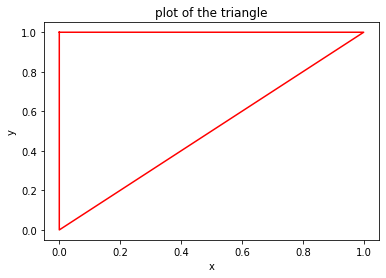

In [16]:
tri.triPlot(d)

# Problem 3

The **Sherman-Morrison Formula** gives the inverse of a *rank-one* update of a matrix $A \in \mathbf{R}^{n\times n}$:
$$
    (A + uv^T)^{-1} = A^{-1} - \frac{A^{-1} u v^T A^{-1}}{1 + v^T A^{-1} u}.
$$
That is, if we know the inverse of $A$, and we perturb $A$ by the rank-one matrix $uv^T$, then the Sherman-Morrison formula gives the inverse of the perturbed matrix $A + uv^T$ in terms of $A^{-1}$, $u$, and $v$.

We'll investigate the computational advantages of this formula in this problem.

## Part c

For each $n \in \{50, 100, 200, 400, 800, 1600, 3200\}$:
* Generate $10$ sets of random vectors $u,v, b \in \mathbf{R}^n$.
* For each set of vectors solve the linear system $(I + uv^T)x = b$ using:
    * the **solve** function from **Numpy**.
    * the **Sherman-Morrison formula**.

Record the run-time needed to solve each problem instance using each linear system solver, and plot average run-time as a function of $n$ using a log-log scale. Comment on the shape of these run-time curves and relate these plots to the approximate number of flops needed to solve each problem instance using each solver.


### Hint

You can use the function **numpy.outer** to calculate the rank-one matrix $u v^T$.

In [17]:
#geberating random vectors of size n
def gen(n):
  u=np.random.rand(n)
  v=np.random.rand(n)
  b=np.random.rand(n)
  return u,v,b

In [18]:
n_vec=[50,100,200,400,800,1600,3200]
from time import perf_counter
sher_time=np.zeros((7,10))
solv_time=np.zeros((7,10))
for j in range(len(n_vec)):
  for i in range(10):
    u,v,b=gen(n_vec[j])
    A=np.identity(n_vec[j])+np.outer(u,v)
    #storing time for the first method (solve)
    t_start = perf_counter()
    x=np.linalg.solve(A,b)
    t_stop = perf_counter()
    solv_time[j][i]=t_stop-t_start
    #storing time for the second method (S_M formula)

    t_start=perf_counter()
    x=np.matmul((np.identity(n_vec[j])-np.outer(u,v))/(1+np.inner(v,u)),b)
    t_stop=perf_counter()
    sher_time[j][i]=t_stop-t_start


In [19]:
sher_time_av=np.mean(sher_time,1)
solv_time_av=np.mean(solv_time,1)

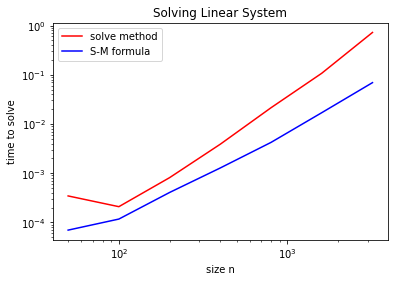

In [20]:
#plotting and comparison
import matplotlib.pyplot as plt
plt.xscale("log")
plt.yscale("log")
plt.plot(n_vec,solv_time_av, color="r", label="solve method")
plt.plot(n_vec,sher_time_av, color="b", label="S-M formula")
plt.xlabel("size n")
plt.ylabel("time to solve")
plt.title("Solving Linear System")
plt.legend()
plt.show()